# Homography
Murphy Tian

I acknowledge that this project work together with Blair Yang


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpldatacursor import datacursor

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x129a6d480>)

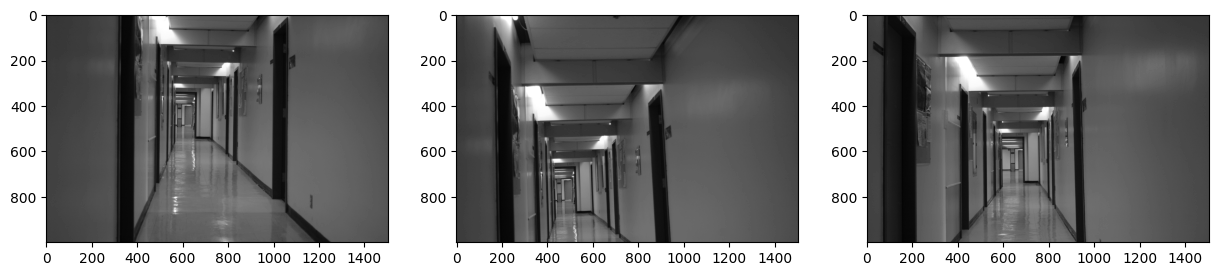

In [2]:
# read the image
img_1 = cv2.imread('./hallway_images/hallway1.jpg')
img_2 = cv2.imread('./hallway_images/hallway2.jpg')
img_3 = cv2.imread('./hallway_images/hallway3.jpg')

# convert images into gray scale
# gray = 0.2989 * R + 0.5870 * G + 0.1140 * B
gray_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
gray_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
gray_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2GRAY)

# plot the gray images
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1), plt.imshow(gray_1, cmap = 'gray')
plt.subplot(1, 3, 2), plt.imshow(gray_2, cmap = 'gray')
plt.subplot(1, 3, 3), plt.imshow(gray_3, cmap = 'gray')

### part 1
since my computer does not support data cursor to select points, hence, I directly record the pixel coordinates of points

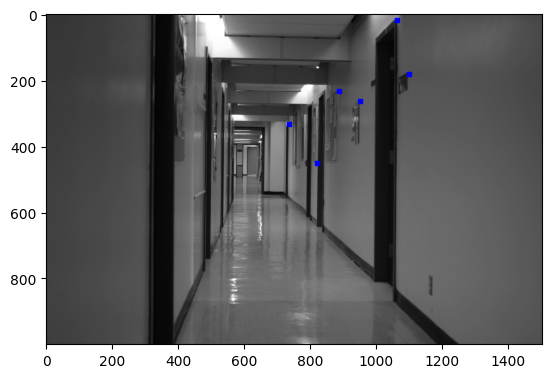

In [3]:
# Case A

# take six pairs of points on hallway1.jpg on the right wall
p11 = [263, 951]
p21 = [230, 887]
p31 = [450, 820]
p41 = [179, 1100]
p51 = [17, 1065]
p61 = [333, 737]

p1 = np.array([p11, p21, p31, p41, p51, p61]).transpose((1, 0))

plt.imshow(gray_1, cmap = 'gray')
plt.scatter(p1[1], p1[0], marker='s', s=5, color='blue')
plt.show()

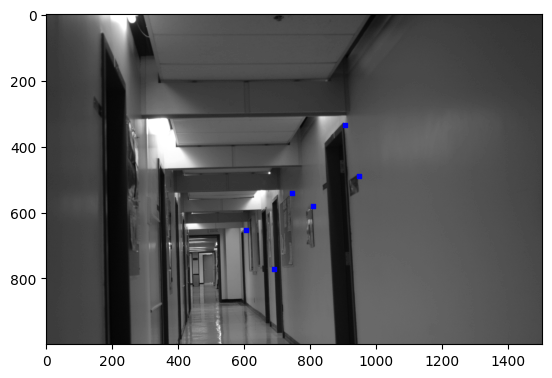

In [4]:
# take six corresponding pairs of points on hallway2.jpg
p12 = [579, 810]
p22 = [542, 745]
p32 = [772, 690]
p42 = [490, 949]
p52 = [336, 906]
p62 = [654, 605]
p2 = np.array([p12, p22, p32, p42, p52, p62]).transpose((1, 0))

plt.imshow(gray_2, cmap = 'gray')
plt.scatter(p2[1], p2[0], marker='s', s=5, color='blue')
plt.show()

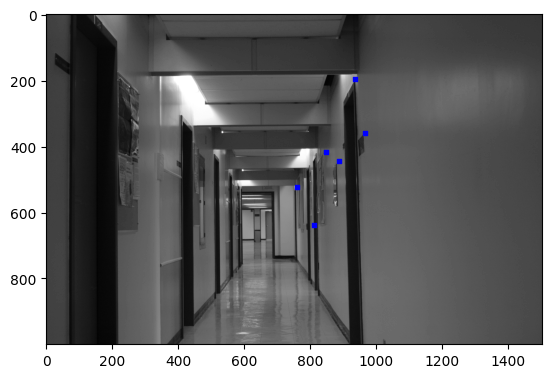

In [5]:
# Case B

# take six corresponding pairs of points on hallway3.jpg
p13 = [443, 887]
p23 = [417, 847]
p33 = [638, 812]
p43 = [360, 965]
p53 = [195, 935]
p63 = [524, 759]
p3 = np.array([p13, p23, p33, p43, p53, p63]).transpose((1, 0))

plt.imshow(gray_3, cmap = 'gray')
plt.scatter(p3[1], p3[0], marker='s', s=5, color='blue')
plt.show()


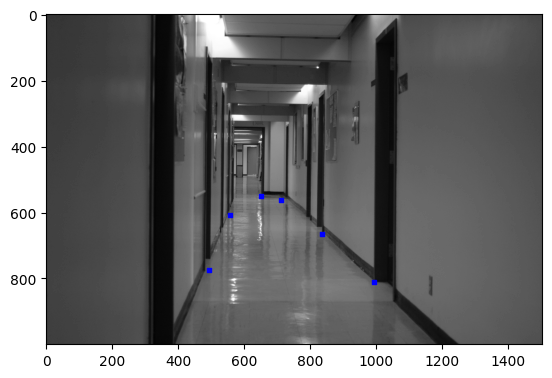

In [6]:
# Case C
# take six pairs of points on the floor of hallway1.jpg
p71 = [811, 995]
p81 = [774, 492]
p91 = [665, 836]
pA1 = [607, 557]
pB1 = [562, 711]
pC1 = [549, 650]
p4 = np.array([p71, p81, p91, pA1, pB1, pC1]).transpose((1, 0))

plt.imshow(gray_1, cmap = 'gray')
plt.scatter(p4[1], p4[0], marker='s', s=5, color='blue')
plt.show()

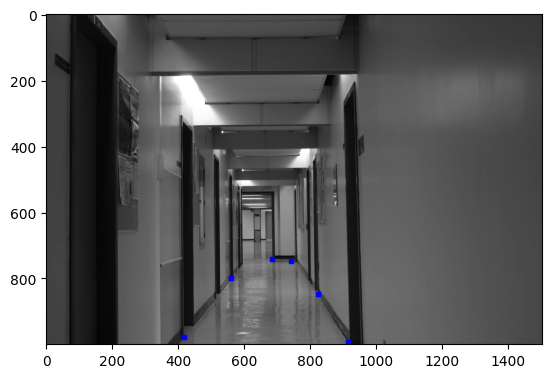

In [7]:
# take six corresponding pairs of points on the floor of hallway3.jpg
p73 = [992, 916]
p83 = [978, 418]
p93 = [847, 824]
pA3 = [800, 561]
pB3 = [747, 741]
pC3 = [740, 685]
p5 = np.array([p73, p83, p93, pA3, pB3, pC3]).transpose((1, 0))

plt.imshow(gray_3, cmap = 'gray')
plt.scatter(p5[1], p5[0], marker='s', s=5, color='blue')
plt.show()


### part 2

In [8]:
def get_homography(pairs=6, p1=None, p2=None):
    A = np.zeros(shape=(2 * pairs, 9), dtype=float)
    for i in range(pairs):
        # odd rows
        odd =2*i
        A[odd][0], A[odd][1] = p1[0][i], p1[1][i]
        A[odd][2] = 1
        A[odd][6] = - p2[0][i] *  p1[0][i]
        A[odd][7] = -  p2[0][i] * p1[1][i]
        A[odd][8] = -  p2[0][i]

        # even rows
        even = odd + 1
        A[even][3], A[even][4] = p1[0][i], p1[1][i]
        A[even][5] = 1
        A[even][6] = - p2[1][i] *  p1[0][i]
        A[even][7] = -  p2[1][i] * p1[1][i]
        A[even][8] = -  p2[1][i]

    A = np.matmul(A.T, A)
    eig_val, eig_vec = np.linalg.eig(A)
    min_index = np.where(eig_val == np.min(eig_val))[0]
    h = eig_vec[:, min_index]
    mat = h.reshape(3, 3)
    return mat

In [34]:
# homography H in Case A
H1 = get_homography(6, p1, p2)
H1

array([[-2.41217864e-03,  1.07000949e-04, -9.80705824e-01],
       [ 1.71929106e-04, -2.48647335e-03,  1.95438553e-01],
       [ 3.78006097e-07,  7.78225261e-08, -2.79583537e-03]])

In [10]:
# homography H in Case B
H2 = get_homography(6, p1, p3)
H2

array([[ 9.70398456e-04, -2.85384817e-04,  5.06820810e-01],
       [-2.25155665e-04,  1.69224711e-04,  8.62049102e-01],
       [-3.16811430e-07, -5.54771847e-07,  1.70576720e-03]])

In [11]:
# homography H in Case C
H3 = get_homography(6, p4, p5)
H3

array([[-2.66916035e-03,  2.23879085e-04, -6.09972822e-01],
       [ 1.26568185e-03, -2.60720681e-03, -7.92407908e-01],
       [ 3.05704767e-08,  1.02809994e-07, -2.69987452e-03]])

### part 3

In [12]:
def get_estimation(H, origin, pairs=6,):
    estimation = []
    for i in range(pairs):
        src = np.array( [origin[0][i], origin[1][i], 1])
        est = np.matmul(H, src)
        est /= est[2]
        estimation.append(est[:2])
    estimation = np.array(estimation).transpose(1,0)
    return estimation

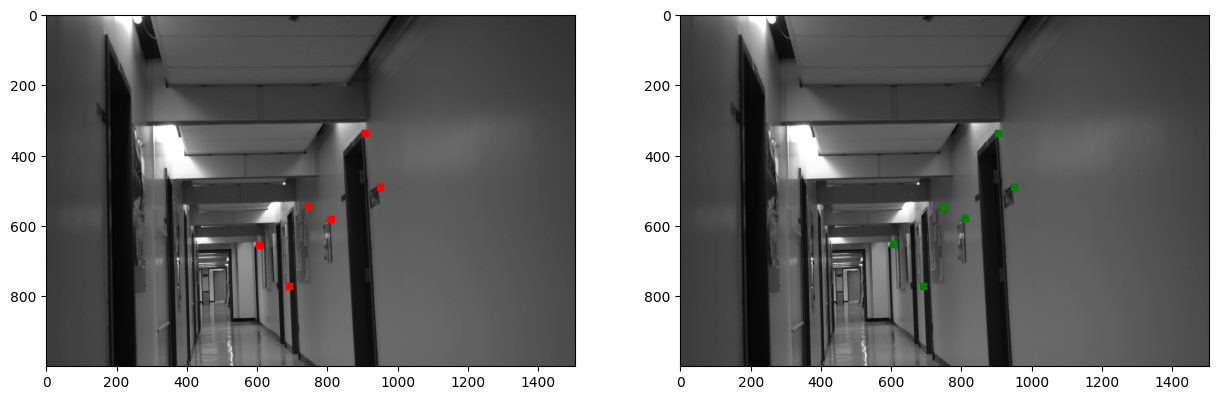

In [13]:
# estimation point and actual point of Case A
e1 = get_estimation(H1, p1)

plt.figure(figsize=(15, 15))
plt.subplot(1,2,1),plt.imshow(gray_2, cmap='gray'), plt.scatter(p2[1], p2[0], marker='s', s=15, color='red')
plt.subplot(1,2,2), plt.imshow(gray_2, cmap='gray'), plt.scatter(e1[1], e1[0], marker='s', s=15, color='green')
plt.show()

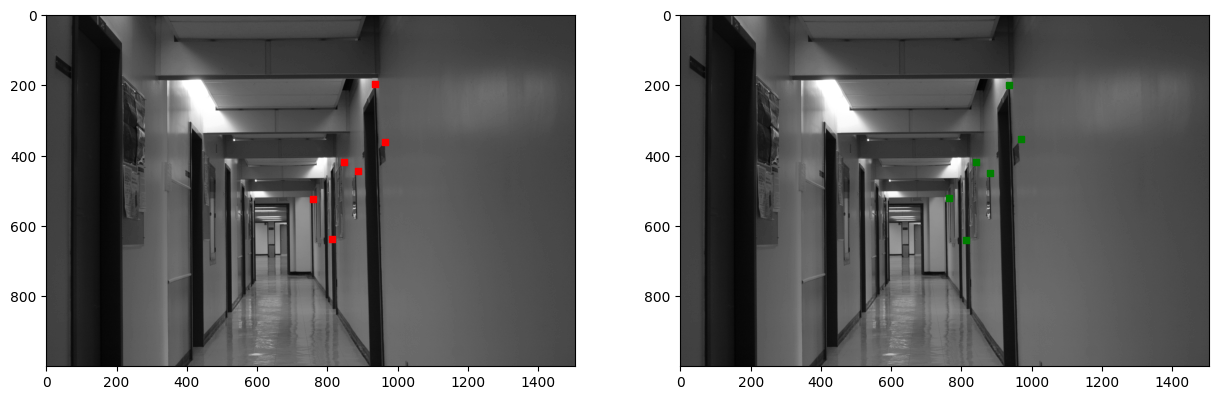

In [14]:
# estimation point and actual point of Case B
e2 = get_estimation(H2, p1)

plt.figure(figsize=(15, 15))
plt.subplot(1,2,1),plt.imshow(gray_3, cmap='gray'), plt.scatter(p3[1], p3[0], marker='s', s=15, color='red')
plt.subplot(1,2,2), plt.imshow(gray_3, cmap='gray'), plt.scatter(e2[1], e2[0], marker='s', s=15, color='green')
plt.show()

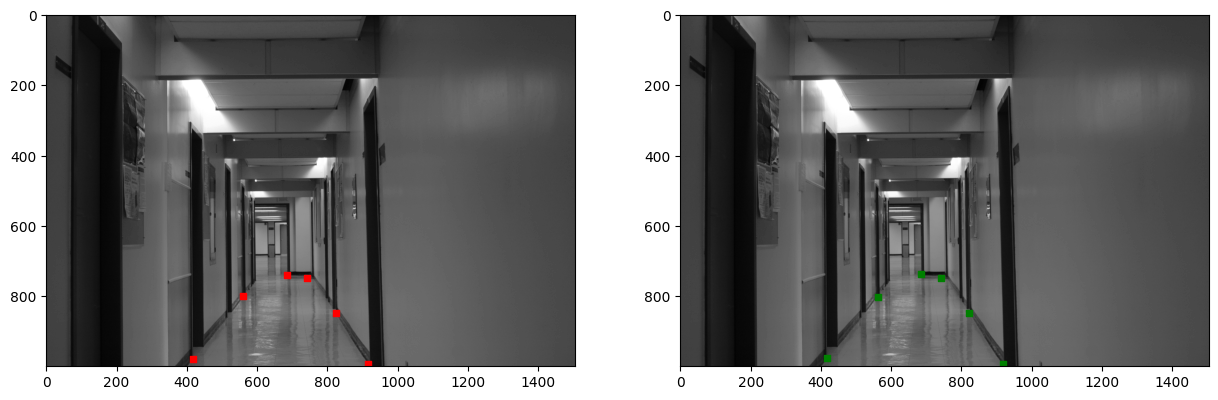

In [15]:
# estimation point and actual point of Case C
e3 = get_estimation(H3, p4)

plt.figure(figsize=(15, 15))
plt.subplot(1,2,1),plt.imshow(gray_3, cmap='gray'), plt.scatter(p5[1], p5[0], marker='s', s=15, color='red')
plt.subplot(1,2,2), plt.imshow(gray_3, cmap='gray'), plt.scatter(e3[1], e3[0], marker='s', s=15, color='green')
plt.show()

### part 4

In [21]:
def q_4(margin,raw_image, raw_image_bar, matrix):
    height = raw_image.shape[0] + 2 * margin
    width = raw_image.shape[1] + 2 * margin
    new_image = np.zeros(shape=(height, width, 3), dtype=int)
    for i in range(new_image.shape[0]):
        for j in range(new_image.shape[1]):
            if new_image.shape[0] - margin > i > margin-1 and new_image.shape[1] - margin > j > margin-1:
                new_image[i][j][0] = raw_image[i-margin][j-margin]

            v = [i-margin-1, j-margin-1]
            vec = np.array([v[0], v[1], 1])
            result = np.dot(matrix, vec)
            result /= result[2]
            pixel = np.round(rslt[:2])
            new_coord = pixel.astype(int)
            x, y = new_coord[0], new_coord[1]
            if 0 <= y < 1504 and 0 <= x < 1000:
                new_image[i][j][1] = raw_image_bar[x][y]
                new_image[i][j][2] = raw_image_bar[x][y]
    return new_image

In [25]:
image1 = q_4(400, gray_1, gray_2, H1)

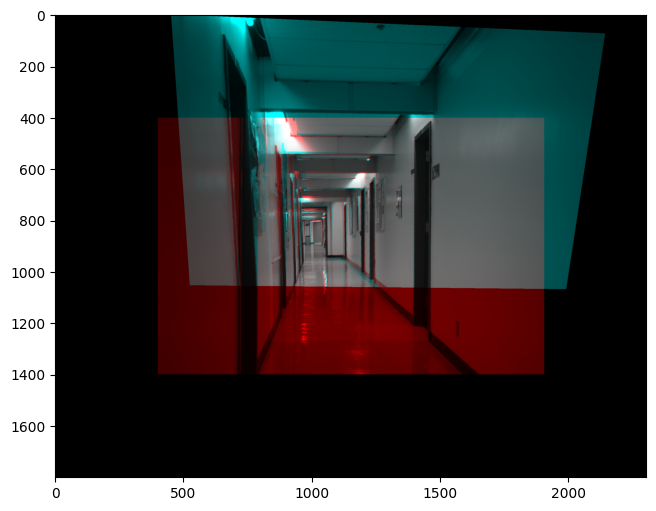

In [26]:
plt.figure(figsize=(20,6))
plt.imshow(image1)
plt.show()


In [27]:
image2 = q_4(500, gray_1, gray_3, H2)

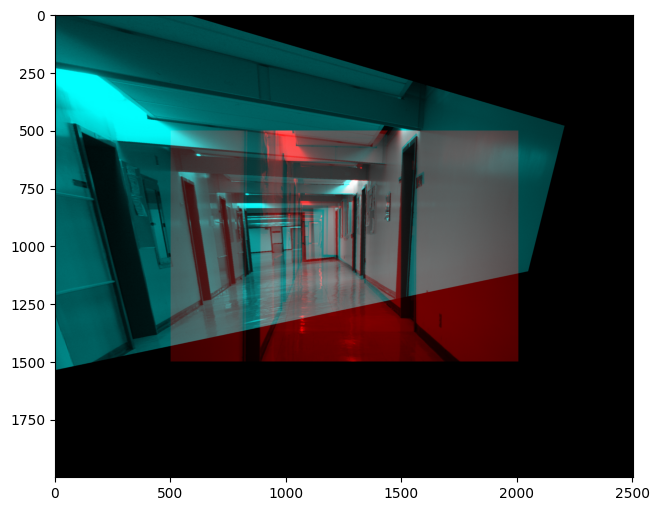

In [31]:
plt.figure(figsize=(20,6))
plt.imshow(image2)
plt.show()

In [29]:
image3 = q_4(500, gray_1, gray_3, H3)

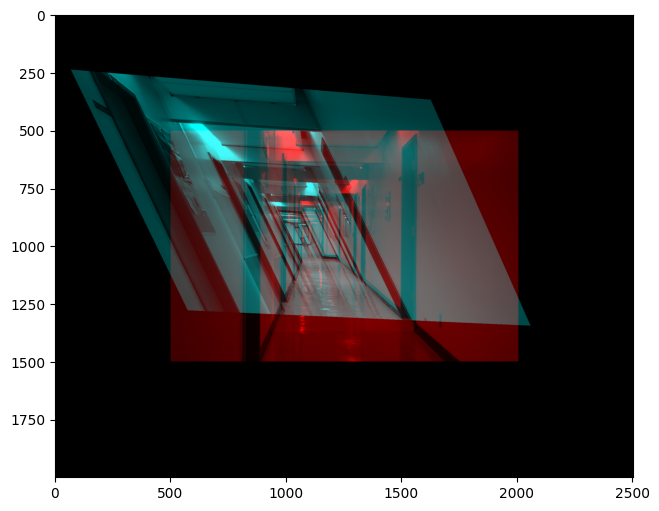

In [32]:
plt.figure(figsize=(20, 6))
plt.imshow(image3)
plt.show()
